## Введение

Был подготовлен список гипотез для увеличения выручки крупного интернет-магазина. В файле hypothesis.csv содержатся 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами reach, impact, confidence, effort. Был проведен А/В-тест и получены результаты, которые описаны в файлах orders.csv и visitors.csv. Цель проекта: приоритизировать гипотезы, запустить А/В тест и проанализировать результаты.

## Оглавление   
1. [Подготовка данных](#preparation)  
    1.1. [Открытие файла visitors.csv и подготовка данных](#open_visitors)  
    1.2. [Открытие файла orders.csv и подготовка данных](#open_orders)  
    1.3. [Открытие файла hypotesis.csv](#open_hypotesis)  
2. [Часть 1. Приоретизация гипотез](#part1)   
    2.1. [Фреймворк ICE](#ice)   
    2.2. [Фреймворк RICE](#rice)   
    2.3. [Выводы по Части 1](#conclusion1)  
3. [Часть 2. Анализ А/В-теста](#part2)   
    3.1. [График кумулятивной выручки для разных групп](#cum_rev)   
    3.2. [График кумулятивного среднего чека по группам](#cum_check)   
    3.3. [График относительного изменения кумулятивного среднего чека группы В к группе А](#cum_check2)   
    3.4. [График кумулятивной конверсии по группам](#cum_conv)   
    3.5. [График относительного изменения кумулятивной конверсии по группам](#cum_conv2)   
    3.6. [Точечный График количества заказов по пользователям](#point_orders)   
    3.7. [Расчет 95-й и 99-й перцентилей количества заказов на пользователя](#user95)  
    3.8. [Построение точечного графика стоимостей заказов](#point_rev)   
    3.9. [Вычисление 95-й и 99-й перцентилей стоимости заказов](#rev95)   
    3.10 [Расчет статистической значимости различий в конверсии между группами по «сырым» данным](#sample)   
    3.11. [Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным](#sample2)   
    3.12. [Расчет статистической значимости различий в конверсии между группами по "очищенным" данным](#clean)   
    3.13. [Расчет статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным](#clean2)  
    3.14. [Выводы по Части 2](#conclusion2)
4. [Общий вывод](#conclusion)

## Подготовка данных
<a id="preparation"></a>

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
import seaborn as sns

In [2]:
visitors=pd.read_csv('datasets/visitors.csv')
print(visitors.info())
display(visitors.head())
print("Таблица содержит {:.0f} дубликатов".format(visitors.duplicated().sum()))
print(visitors['group'].value_counts())
visitors['date']=pd.to_datetime(visitors['date'])
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Таблица содержит 0 дубликатов
B    31
A    31
Name: group, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [3]:
orders=pd.read_csv('datasets/orders.csv ')
orders.columns = orders.columns.str.lower()
print(orders.info())
display(orders.head())
print("Таблица содержит {:.0f} дубликатов".format(orders.duplicated().sum()))
print(orders['group'].value_counts())
orders['date']=pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Таблица содержит 0 дубликатов
B    640
A    557
Name: group, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [4]:
hypothesis=pd.read_csv('datasets/hypothesis.csv ')
print(hypothesis.info())
display(hypothesis.head())
print("Таблица содержит {:.0f} дубликатов".format(hypothesis.duplicated().sum()))
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis['hypothesis'].unique())
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Таблица содержит 0 дубликатов


array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Таблицы данных были открыты и подготовлены к анализу. Пропущенных значений и дубликатов не обнаружено. Для удобства обращения заглавные буквы в именах столбцов были изменены на строчные. Так же были изменены типы некоторых столбцов ( в таблице visitors - столбцы, содержание дату, в таблице orders - столбец, содержащий информацию о дате заказа) на тип datetime.

## Часть1. Приоретизация гипотез <a id='part1'></a>

#### Фреймворк ICE <a id='ice'></a>

In [5]:
hypothesis['ice']=((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round()
display(hypothesis.sort_values(by='ice',ascending=False), pd.set_option('display.max_columns', None))
pd.options.display.max_colwidth = 150

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.0


None

####  Фреймворк RICE <a id='rice'></a>

In [6]:
hypothesis['rice']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis['ice']=hypothesis['ice'].astype('int')
hypothesis['rice']=hypothesis['rice'].astype('int')
#display(hypothesis.sort_values(by='rice',ascending=False), pd.set_option('display.max_columns', None))
#pd.options.display.max_colwidth = 150
cm = sns.light_palette("green", as_cmap=True)
s = hypothesis.sort_values(by='rice',ascending=False).style.background_gradient(cmap=cm)
s

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


## Часть 1. Вывод <a id='conclusion1'></a>

При применении метода ICE(влияние, уверенность, усилия) наиболее приоритетными были гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". При применении метода RICE(влияние, уверенность, усилия, охват) наиболее приоритетными оказались гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"(последние две гипотезы имеют одинаковое значение rice). Рассмотрим полученные результаты более подробно. Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" по фрейморку ICE находится на 3 месте, а по фреймворку RICE - 1м месте, очевидно, что изменения, которые возникнут при реализации на практике данной гипотезы затронут наибольшее количество пользователей из-за чего по фреймфорку RICE данная гипотеза "обошла" гипотезы "Запустить акцию, дающую скидку на товар в день рождения" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". Очевидно, по причине большого охвата гипотеза "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" "догнала" гипотезу "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" по фреймворку RICE.

## Часть 2. Анализ А/В-теста <a id='part2'></a>

#### Построение графиков кумулятивной выручки по группам <a id='cum_rev'></a>

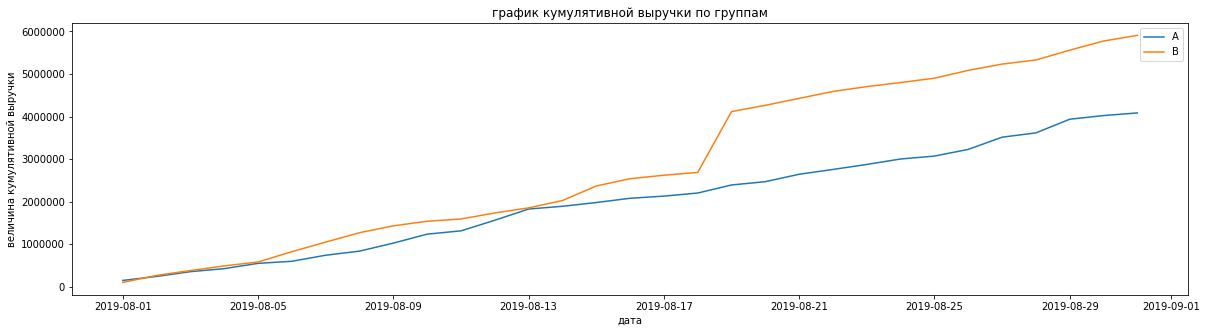

In [7]:
#массив уникальных пар значений дат и групп теста
datesGroups=orders[['date','group']].drop_duplicates()
#агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <=
x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',
'transactionid': pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}),
axis=1).sort_values(by=['date','group'])
#агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date']
<= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединение кумулятивных данные в одной таблице
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'],
right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(20,5))
# график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
# график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('график кумулятивной выручки по группам')
plt.xlabel('дата')
plt.ylabel('величина кумулятивной выручки')
plt.show()

График показывает, что кумулятивная выручка группы В в первой половине теста немного превосходит кумулятивную выручку группы А, а во второй половине - становится значительно выше. Можно сделать вывод, что группа В стабильно лучше, чем группа А.

#### Построение графиков кумулятивного среднего чека по группам <a id='cum_check'></a>

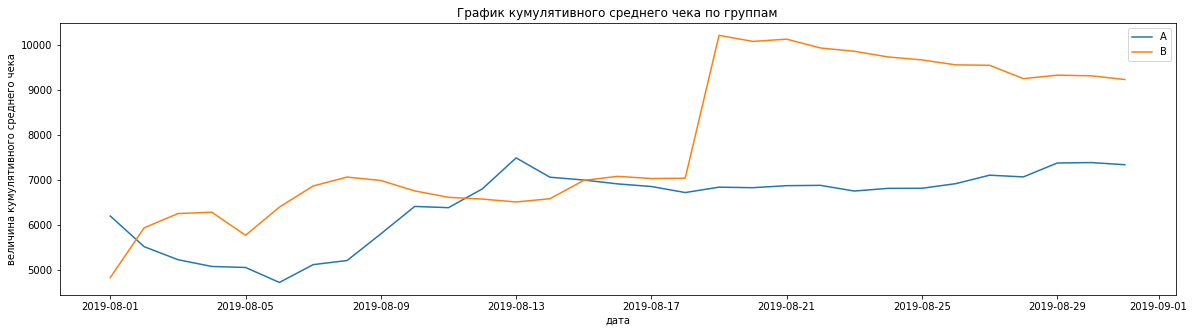

In [8]:
plt.figure(figsize=(20,5))
#график кумулятивного среднего чека группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
#график кумулятивного среднего чека группы В
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('величина кумулятивного среднего чека')
plt.show()

На графике можно видеть, что показатель кумулятивного среднего чека группы В почти на протяжении всего теста значительно выше, чем группы А, за исключением первых дней теста и нескольких дней по окончании трети времени теста, когда можно наблюдать резкий скачок в группе А. На основании приведенного графика можно сделать вывод, что, в основном, кумулятивный средний чек группы В значительно превосходит кумулятивный средний чек группы А.

#### Построение графика относительного изменения кумулятивного среднего чека группы В к группе А <a id='cum_check2'></a>

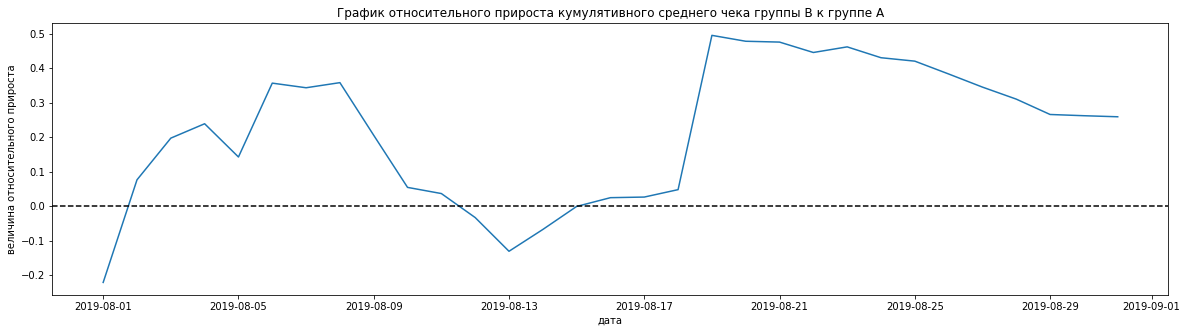

In [9]:
plt.figure(figsize=(20,5))
# сбор данных в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date',
right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCummulativeRevenue['date'], (
    mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(
    mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного прироста кумулятивного среднего чека группы В к группе А')
plt.xlabel('дата')
plt.ylabel('величина относительного прироста')
plt.show()

В нескольких точках график различия сильно "скачет", что может говорить о крупных заказах.

#### Построение графика кумулятивной конверсии по группам <a id='cum_conv'></a>

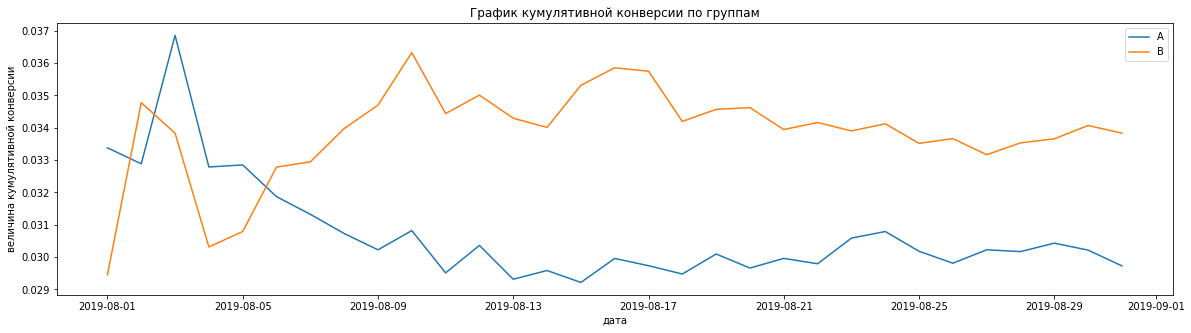

In [10]:
#кумулятивная конверсия
cummulativeData['conversion']=cummulativeData['orders']/cummulativeData['visitors']
#разделение данных по группам
cummulativeDataA=cummulativeData[cummulativeData['group']=='A']
cummulativeDataB=cummulativeData[cummulativeData['group']=='B']
plt.figure(figsize=(20,5))
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'],label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'],label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('дата')
plt.ylabel('величина кумулятивной конверсии')
plt.show()

Можно видеть, что график симметричный и значения конверсий обеих групп с некоторым допущением зафиксировались. График демонстрирует, что конверсия группы В значительно превосходит конверсию группы А на протяжении всей второй половины времени теста.

#### Построение графика относительного изменения кумулятивной конверсии по группам <a id='cum_conv2'></a>

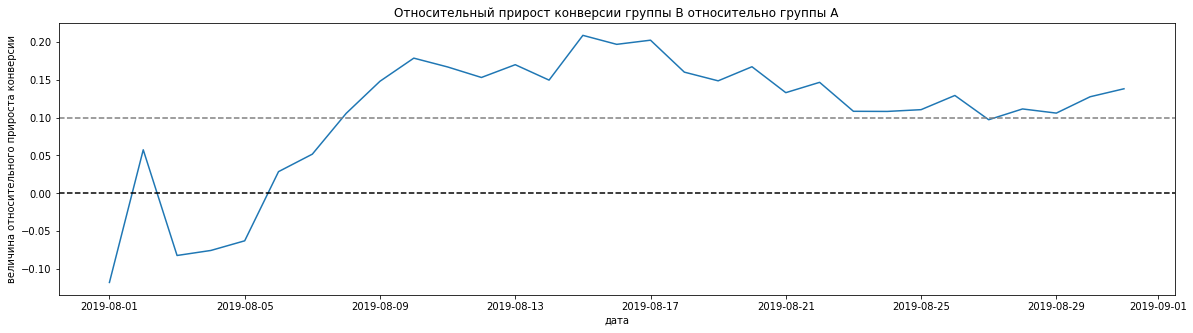

In [11]:
plt.figure(figsize=(20,5))
#сбор данных в одном датафрейме
mergedCumulativeConversions=cummulativeDataA[['date','conversion']].merge(
    cummulativeDataB[['date','conversion']], left_on='date',right_on='date',how='left', suffixes=['A','B'])
#построение графиков
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title("Относительный прирост конверсии группы В относительно группы А")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('дата')
plt.ylabel('величина относительного прироста конверсии')
plt.show()

В начале теста конверсия группы В стремительно росла, затем был зафиксирован резкое падение и быстрое возвращение к уверенному росту. Можно сделать вывод, что на протяжении 75% времени теста конверсия группы В непрерывно значительно превосходила конверсию группы А.

#### Построение точечного графика  количества заказов по пользователям <a id='point_orders'></a>

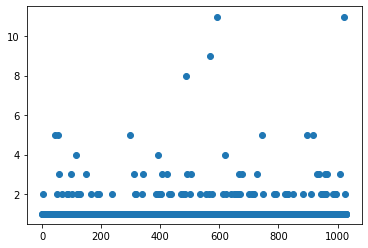

In [12]:
#группировка данных о количествах заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby(
    'visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

На графике можно видеть, что чаще всего пользователи делали 1-2 заказа.

#### Расчет 95-й и 99-й перцентилей количества заказов на пользователя <a id='user95'></a>

In [13]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше, чем 2 заказа и 1% пользователей оформлял 4 и более заказов.

#### Построение точечного графика стоимостей заказов. <a id='point_rev'></a>

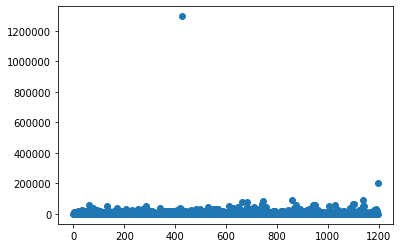

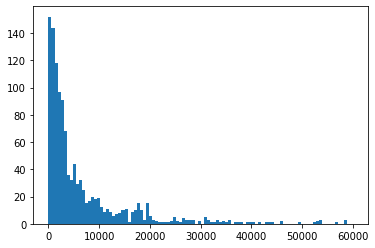

In [14]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.show()
plt.hist(orders['revenue'], bins=100, range=(0,60000))
plt.show()

Из графиков можно видеть, что большая часть пользователей совершала заказы стоимостью до 20000, есть единичные заказы стоимостью 200000 и более 1200000.

#### Вычисление 95-й и 99-й перцентилей стоимости заказов <a id='rev95'></a>

In [15]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Расчет 90, 95 и 99 перцентилей подтвержадает данные, представленные на графиках: не более 10% пользователей совершали заказы на сумму выше 18168, не более 5% пользователей-на сумму выше 28000 и до 1% пользователей - на сумму выше 58233.2.

#### Расчет статистической значимости различий в конверсии между группами по «сырым» данным <a id='sample'></a>

Для выяснения статистической значимости различий в конверсии между группами по "сырым" данным проверим гипотезу.  
Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.  
Обратная гипотеза: статистически значимые различия в конверсии между группами есть.

In [16]:
#выделение количества пользователей по дням в группе А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#выделение количества пользователей до определенной даты включительно в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
    .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
#выделение количества пользователей по дням в группе В
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#выделение количества пользователей до определенной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
    .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#выделение количества заказов по дням в группе А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#выделение суммарного количества заказов до определенной даты включительно в группе А
ordersACummulative = ordersADaily.apply(
    lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
    .agg({'date' : 'max','ordersPerDateA' : 'sum','revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
#выделение количества заказов по дням в группе В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
#выделение суммарного количества заказов до определенной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: 
        ordersBDaily[ordersBDaily['date'] <= x['date']]
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
#объединение данных в один датафрейм
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left').merge(
    ordersACummulative, left_on='date', right_on='date', how='left').merge(
    ordersBCummulative, left_on='date', right_on='date', how='left').merge(
    visitorsADaily, left_on='date', right_on='date', how='left').merge(
    visitorsBDaily, left_on='date', right_on='date', how='left').merge(
    visitorsACummulative, left_on='date', right_on='date', how='left').merge(
    visitorsBCummulative, left_on='date', right_on='date', how='left')
#группировка информации о заказах, совершенных клиентами из группы А
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
#группировка информации о заказах, совершенных клиентами из группы В
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
#создание выборки соотвествия количества заказов для определенного пользователя группы А
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
#создание выборки соотвествия количества заказов для определенного пользователя группы В
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.008
0.138


Первое число — p-value = 0.008  меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы В = 13.8%.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным <a id='sample2'></a>

In [17]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


p-value=0.365, что значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем. Средний чек группы В значительно выше среднего чека группы А (25.9%).

#### Расчет статистической значимости различий в конверсии между группами по "очищенным" данным <a id='clean'></a>

Как было выяснено ранее, не более 5% пользователей оформляли больше, чем 2 заказа, и на сумму выше 28000 и 1% пользователей оформлял 4 и более заказов и на сумму выше 58233.2. Исходя из этой информации, для "очистки" данных от аномальных выбросов следует убрать данные о пользователях, совершивших слишком большое количество заказов(в данном случае больше 2) и/или совершивших слишком дорогие заказы(в данном случае дороже 30000).

In [18]:
#выделение клиентов, совершивших слишком много заказов
usersWithManyOrders=pd.concat([ordersByUsersA[ordersByUsersA['orders']>2]['userId'],ordersByUsersB[ordersByUsersB['orders']>2]['userId']],axis=0)
#выделение клиентов, совершивших слишком дорогие заказы
usersWithExpensiveOrders=orders[orders['revenue']>28000]['visitorid']
#объединение "очищенных" данных
abnormalUsers=pd.concat([usersWithManyOrders,usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
x=abnormalUsers.shape
y=orders.shape
print(abnormalUsers.head())
print("Аномальных заказов: ", len(abnormalUsers))
print("Что составляет {:.1%} от всех заказов".format(len(abnormalUsers)/len(orders)))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Аномальных заказов:  74
Что составляет 6.2% от всех заказов


74 аномальных заказа из 1197, что составляет около 6.2%

In [19]:
#создание выборки "очищенных" данных соотвествия количества заказов для определенного пользователя группы А
sampleAFiltered=pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, 
index=np.arange(data['visitorsPerDateA'].sum()-len(ordersByUsersA['orders'])),name='orders')],axis=0)
#создание выборки "очищенных" данных соотвествия количества заказов для определенного пользователя группы А
sampleBFiltered=pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, 
index=np.arange(data['visitorsPerDateB'].sum()-len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.173


Результаты расчета статистической значимости различий в конверсии между группами по «сырым» данным и очищенным данным почти одинаковы.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным <a id='clean2'></a>

In [20]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                                         orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))
print("{0:.3f}".format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
                       orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()-1)) 

0.369
-0.020


P-value практически не изменился по сравнению с расчетами по "сырым" данным, но разница между сегментами изменилась: теперь средний чек группы В примерно на 2% ниже среднего чека группы А. 

### Часть 2. Вывод <a id='conclusion2'></a>

**1** Есть статистически значимое различие по конверсии между группами по сырым данным и после фильтрации  
**2** Нет статистически значимого различия по среднему чеку между группами по сырым данным и после фильтрации  
**3** График различия конверсии между группами сообщает, что результаты группы В лучше, чем группы А: зафиксировались в некотором диапазоне и имеют небольшую тенденцию к росту  
**4** График различия среднего чека между группами колеблется, что позволило выявить аномально дорогие заказы  
**Вывод** тест можно остановить, группа В статистически лучше группы А, а график конверсии указывает на фиксацию результата.

#### Примечание

Разница в среднем чеке заказа по сырым и отфильтрованным данным может указывать на то, что клиенты начали совершать покупки чаще, но на меньшие суммы. Для уточнения результатов рекомендуется провести анализ наиболее популярных категорий и наименований товаров.

## Вывод <a id='conclusion'></a>

**1** При применении метода ICE(влияние, уверенность, усилия) наиболее приоритетными были гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". При применении метода RICE(влияние, уверенность, усилия, охват) наиболее приоритетными оказались гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"(последние две гипотезы имеют одинаковое значение rice), что указывает на то, что реализация данных гипотез на практике затронет наибольшее количество пользователей.  
**2** Тест можно остановить, группа В статистически лучше группы А, а график конверсии указывает на фиксацию результата.  
**Примечание**  Разница в среднем чеке заказа по сырым и отфильтрованным данным может указывать на то, что клиенты начали совершать покупки чаще, но на меньшие суммы. Для уточнения результатов рекомендуется провести анализ наиболее популярных категорий и наименований товаров.